스크래핑된 뉴스 읽어오기

In [1]:
import csv

In [2]:
news = []
with open('lfsonata.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

형태소 분석기

In [3]:
from konlpy.tag import Twitter

In [4]:
tagger = Twitter()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [7]:
tdf = cv.fit_transform(news)

In [8]:
tdf

<572x50 sparse matrix of type '<class 'numpy.int64'>'
	with 1060 stored elements in Compressed Sparse Row format>

단어 목록

In [9]:
words = cv.get_feature_names()

In [10]:
words

['가격',
 '가스',
 '계약',
 '구매',
 '구입',
 '그랜져',
 '기본',
 '너무',
 '년',
 '뉴',
 '더',
 '디자인',
 '디젤',
 '막',
 '만원',
 '말리부',
 '모델',
 '보고',
 '비교',
 '사진',
 '샷',
 '소나타',
 '스파이',
 '승기',
 '시',
 '시승',
 '신차',
 '신형',
 '실내',
 '언제',
 '오늘',
 '옵션',
 '와',
 '요',
 '이번',
 '이유',
 '임팔라',
 '좀',
 '질문',
 '차량',
 '차이',
 '출시',
 '타',
 '택시',
 '터보',
 '펌',
 '풀옵',
 '하이브리드',
 '현대',
 '휠']

한 글자 짜리 단어 빼기

In [11]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [12]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [13]:
tdf = cv.fit_transform(news)

In [14]:
words = cv.get_feature_names()

In [15]:
words

['가격',
 '가스',
 '계약',
 '구매',
 '구입',
 '그랜저',
 '그랜져',
 '급발진',
 '기본',
 '너무',
 '다른',
 '대결',
 '디자인',
 '디젤',
 '램프',
 '만원',
 '말리부',
 '모델',
 '미스트',
 '보고',
 '비교',
 '사진',
 '생각',
 '소나타',
 '스파이',
 '승기',
 '시승',
 '시트',
 '신차',
 '신형',
 '실내',
 '언제',
 '오늘',
 '옵션',
 '위장',
 '이번',
 '이유',
 '임팔라',
 '제네시스',
 '진짜',
 '질문',
 '차량',
 '차이',
 '최고',
 '출시',
 '택시',
 '터보',
 '풀옵',
 '하이브리드',
 '현대']

단어별 출현 빈도

In [16]:
import numpy

In [17]:
count_mat = tdf.sum(axis=0)

In [18]:
count_mat

matrix([[  6,   6,   6,   6,   5,   5,  11,   5,   6,   6,   5,   4,  15,
          18,   5,   6,  33,   7,   5,   6,  10,  12,   5, 573,  10,  11,
           5,   5,   6,  11,  15,   5,   6,   9,   5,   7,   9,   6,   5,
           5,  20,   9,  10,   5,  12,  15,  44,   6,  20,  11]], dtype=int64)

In [19]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [20]:
count

array([  6,   6,   6,   6,   5,   5,  11,   5,   6,   6,   5,   4,  15,
        18,   5,   6,  33,   7,   5,   6,  10,  12,   5, 573,  10,  11,
         5,   5,   6,  11,  15,   5,   6,   9,   5,   7,   9,   6,   5,
         5,  20,   9,  10,   5,  12,  15,  44,   6,  20,  11], dtype=int64)

In [21]:
word_count = list(zip(words, count))

In [22]:
word_count

[('가격', 6),
 ('가스', 6),
 ('계약', 6),
 ('구매', 6),
 ('구입', 5),
 ('그랜저', 5),
 ('그랜져', 11),
 ('급발진', 5),
 ('기본', 6),
 ('너무', 6),
 ('다른', 5),
 ('대결', 4),
 ('디자인', 15),
 ('디젤', 18),
 ('램프', 5),
 ('만원', 6),
 ('말리부', 33),
 ('모델', 7),
 ('미스트', 5),
 ('보고', 6),
 ('비교', 10),
 ('사진', 12),
 ('생각', 5),
 ('소나타', 573),
 ('스파이', 10),
 ('승기', 11),
 ('시승', 5),
 ('시트', 5),
 ('신차', 6),
 ('신형', 11),
 ('실내', 15),
 ('언제', 5),
 ('오늘', 6),
 ('옵션', 9),
 ('위장', 5),
 ('이번', 7),
 ('이유', 9),
 ('임팔라', 6),
 ('제네시스', 5),
 ('진짜', 5),
 ('질문', 20),
 ('차량', 9),
 ('차이', 10),
 ('최고', 5),
 ('출시', 12),
 ('택시', 15),
 ('터보', 44),
 ('풀옵', 6),
 ('하이브리드', 20),
 ('현대', 11)]

빈도 순 정렬

In [23]:
import operator

In [24]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('소나타', 573),
 ('터보', 44),
 ('말리부', 33),
 ('질문', 20),
 ('하이브리드', 20),
 ('디젤', 18),
 ('디자인', 15),
 ('실내', 15),
 ('택시', 15),
 ('사진', 12),
 ('출시', 12),
 ('그랜져', 11),
 ('승기', 11),
 ('신형', 11),
 ('현대', 11),
 ('비교', 10),
 ('스파이', 10),
 ('차이', 10),
 ('옵션', 9),
 ('이유', 9),
 ('차량', 9),
 ('모델', 7),
 ('이번', 7),
 ('가격', 6),
 ('가스', 6),
 ('계약', 6),
 ('구매', 6),
 ('기본', 6),
 ('너무', 6),
 ('만원', 6),
 ('보고', 6),
 ('신차', 6),
 ('오늘', 6),
 ('임팔라', 6),
 ('풀옵', 6),
 ('구입', 5),
 ('그랜저', 5),
 ('급발진', 5),
 ('다른', 5),
 ('램프', 5),
 ('미스트', 5),
 ('생각', 5),
 ('시승', 5),
 ('시트', 5),
 ('언제', 5),
 ('위장', 5),
 ('제네시스', 5),
 ('진짜', 5),
 ('최고', 5),
 ('대결', 4)]

워드 클라우드

In [35]:
%matplotlib inline

In [37]:
from wordcloud import WordCloud

In [38]:
from matplotlib import pyplot

In [39]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

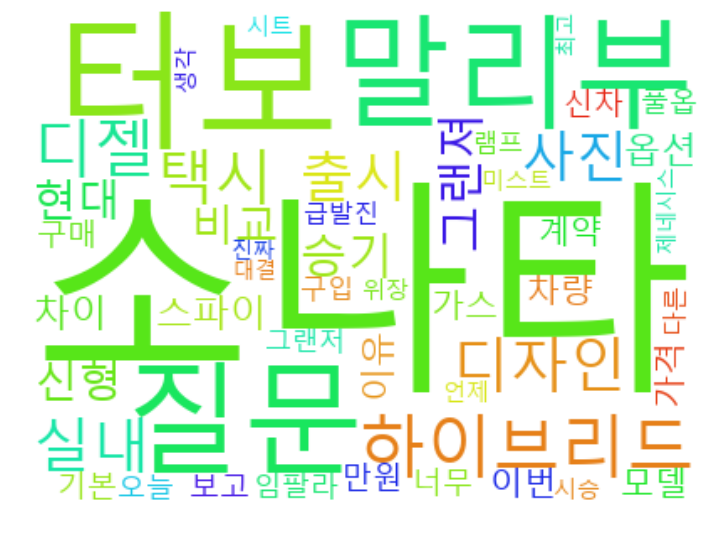

In [40]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

소나타 게시글중 부전적인 단어는 크게 없으며 하이브리드가 관심이 많고 말리부는 소나타의 경쟁모델이라 소나타랑 말리부중에 뭐가 더 좋아요? 이런 질문이 많이 나왔음

소나타는 전반적으로 부정적인 의견은 없다

단어간 상관계수

In [25]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)

In [26]:
word_corr

array([[ 1.        , -0.01060071, -0.01060071, ...,  0.15783274,
        -0.01783672, -0.01441725],
       [-0.01060071,  1.        , -0.01060071, ..., -0.01060071,
        -0.01783672, -0.01441725],
       [-0.01060071, -0.01060071,  1.        , ...,  0.15783274,
        -0.01783672, -0.01441725],
       ..., 
       [ 0.15783274, -0.01060071,  0.15783274, ...,  1.        ,
        -0.01783672, -0.01441725],
       [-0.01783672, -0.01783672, -0.01783672, ..., -0.01783672,
         1.        , -0.02425841],
       [-0.01441725, -0.01441725, -0.01441725, ..., -0.01441725,
        -0.02425841,  1.        ]])

상관관계 높은 것 100개만 추리기

In [27]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

In [28]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [29]:
edges = edges[:50]

In [30]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

상관관계 시각화

In [31]:
import networkx

In [32]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

In [33]:
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

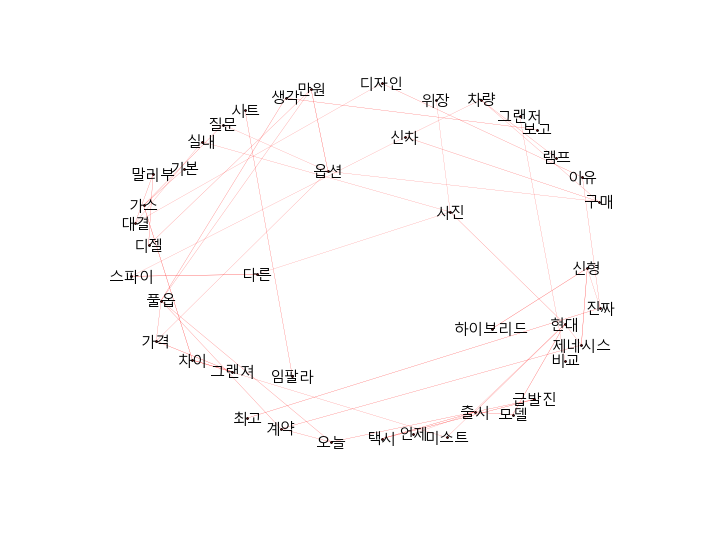

In [41]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=3)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='red')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
plt.axis('off')
pyplot.show()